In [3]:
import os
import pandas as pd

train_data_dir = "C:\\Users\\civin\\Desktop\\DUK\\AIcyber\\biometric\\New_dataset\\train"
test_data_dir = "C:\\Users\\civin\\Desktop\\DUK\\AIcyber\\biometric\\New_dataset\\test"

def inspect_directory(directory):
    files = []
    for class_label in os.listdir(directory):
        class_path = os.path.join(directory, class_label)
        if os.path.isdir(class_path):
            files.extend([(file, class_label) for file in os.listdir(class_path)])
    return pd.DataFrame(files, columns=["FileName", "Class"])

train_df = inspect_directory(train_data_dir)
test_df = inspect_directory(test_data_dir)

print("Train Dataset Class Distribution:")
print(train_df["Class"].value_counts())
print("\nTest Dataset Class Distribution:")
print(test_df["Class"].value_counts())

train_df["FilePath"] = train_df.apply(lambda row: os.path.join(train_data_dir, row["Class"], row["FileName"]), axis=1)
train_df["Missing"] = train_df["FilePath"].apply(lambda x: not os.path.exists(x))
print(f"Missing files in training dataset: {train_df['Missing'].sum()}")


Train Dataset Class Distribution:
Class
REAL    17168
FAKE    15184
Name: count, dtype: int64

Test Dataset Class Distribution:
Class
REAL    3892
FAKE    3687
Name: count, dtype: int64
Missing files in training dataset: 0


In [ ]:
from tensorflow.keras.utils import image_dataset_from_directory

train_data = image_dataset_from_directory(
    train_data_dir,
    labels="inferred", 
    label_mode="int",   
    image_size=(200, 200),  
    batch_size=40,
    validation_split=0.2,  
    subset="training",     
    seed=42                
)

validation_data = image_dataset_from_directory(
    train_data_dir,
    labels="inferred",
    label_mode="int",
    image_size=(200, 200),
    batch_size=40,
    validation_split=0.2,  
    subset="validation",   
    seed=42
)

test_data = image_dataset_from_directory(
    test_data_dir,
    labels="inferred",
    label_mode="int",
    image_size=(200, 200),
    batch_size=40
)


Found 32352 files belonging to 2 classes.
Using 25882 files for training.
Found 32352 files belonging to 2 classes.
Using 6470 files for validation.
Found 7579 files belonging to 2 classes.


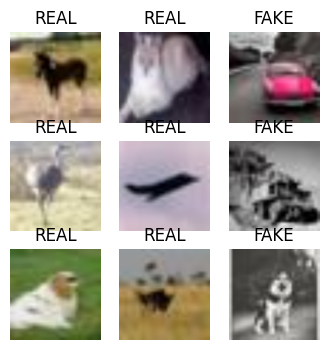

In [ ]:
import matplotlib.pyplot as plt
class_names = train_data.class_names
plt.figure(figsize=(4,4))
for images, labels in train_data.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [ ]:
import tensorflow as tf
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_data = train_data.map(normalize)
validation_data = validation_data.map(normalize)
test_data = test_data.map(normalize)


In [ ]:

train_size = len(train_data) * 40  
val_size = len(validation_data) * 40
test_size = len(test_data) * 40
print(f"Training samples: {train_size}")
print(f"Validation samples: {val_size}")
print(f"Test samples: {test_size}")

Training samples: 25920
Validation samples: 6480
Test samples: 7600


In [8]:
import numpy as np

# Function to extract features and labels
def extract_features(dataset):
    features = []
    labels = []
    for images, lbls in dataset:
        features.append(images.numpy().reshape(images.shape[0], -1))  # Flatten images
        labels.append(lbls.numpy())
    return np.vstack(features), np.hstack(labels)

# Extract features and labels
X_train, y_train = extract_features(train_data)
X_val, y_val = extract_features(validation_data)
X_test, y_test = extract_features(test_data)

print(f"Training set: Features shape {X_train.shape}, Labels shape {y_train.shape}")
print(f"Validation set: Features shape {X_val.shape}, Labels shape {y_val.shape}")
print(f"Test set: Features shape {X_test.shape}, Labels shape {y_test.shape}")


Training set: Features shape (25882, 120000), Labels shape (25882,)
Validation set: Features shape (6470, 120000), Labels shape (6470,)
Test set: Features shape (7579, 120000), Labels shape (7579,)
